The purpose of the model is to predict the future prices of Bitcoin based on historical data and other relevant features. Bitcoin, like many other cryptocurrencies, is a highly volatile and unpredictable asset. Predicting its price movements accurately can be challenging, but it's crucial for traders, investors, and businesses that rely on Bitcoin.

**We use Python as the language for predicting Bitcoin prices using an RNN with GRU or LSTM cells**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional,SimpleRNN
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [2]:
# functions to help out with predictions

def rmse_return(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

#Collecting data:
Collecting the Data from https://www.cryptodatadownload.com/data/bitstamp/
so that it update every time we run the code



In [3]:
dataset = pd.read_csv("https://www.cryptodatadownload.com/cdd/Bitstamp_BTCUSD_d.csv",header=1)
dataset

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1681257600,2023-04-12 00:00:00,BTC/USD,30255.00,30295.00,30251.00,30293.00,1.125199e+00,3.408566e+04
1,1681171200,2023-04-11 00:00:00,BTC/USD,29657.00,30575.00,29617.00,30246.00,2.689405e+03,8.134374e+07
2,1681084800,2023-04-10 00:00:00,BTC/USD,28353.00,29789.00,28184.00,29652.00,2.711673e+03,8.040653e+07
3,1680998400,2023-04-09 00:00:00,BTC/USD,27968.00,28544.00,27833.00,28340.00,7.185477e+02,2.036364e+07
4,1680912000,2023-04-08 00:00:00,BTC/USD,27931.00,28174.00,27891.00,27969.00,4.177631e+02,1.168442e+07
...,...,...,...,...,...,...,...,...,...
3053,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
3054,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
3055,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
3056,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [4]:
dataset1=dataset.copy()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058 entries, 0 to 3057
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        3058 non-null   int64  
 1   date        3058 non-null   object 
 2   symbol      3058 non-null   object 
 3   open        3058 non-null   float64
 4   high        3058 non-null   float64
 5   low         3058 non-null   float64
 6   close       3058 non-null   float64
 7   Volume BTC  3058 non-null   float64
 8   Volume USD  3058 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 215.1+ KB


In [6]:
dataset.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [7]:
dataset.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,3.058000e+03,3058.000000,3058.000000,3058.000000,3058.000000,3.058000e+03,3.058000e+03
mean,1.549195e+09,13486.927413,13858.993784,13064.879807,13496.758489,1.153052e+07,6.031481e+07
std,7.628367e+07,16108.156119,16548.878971,15589.406100,16109.685489,4.413448e+07,1.013727e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.483164e+09,888.430000,905.385000,853.537500,891.910000,3.615827e+03,1.156120e+04
50%,1.549195e+09,7547.830000,7768.575000,7358.000000,7549.115000,9.829982e+03,2.936293e+07
75%,1.615226e+09,19271.600000,19613.322500,18878.870000,19275.582500,2.695427e+06,7.819676e+07
max,1.681258e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


#Data Preprocessing
Overall, we need to write a code that will extracting the date from the date column of the dataset, converting it to a datetime format, changing its format, and setting it as the index of the dataset.

In [8]:
date_df=[]
Date=dataset.date.str.split(" ")  # splitting date when space is encountered
for i in Date:
  date_df.append(i[0])

In [ ]:
dataset.columns

In [10]:
dataset.drop(columns=[ 'unix', 'date', 'symbol', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],inplace=True)

In [11]:
data_df=pd.concat([pd.DataFrame(date_df,columns=["Date"]),dataset],axis=1)
data_df.columns=["Date", 'Open']


In [ ]:
data_df.Date = pd.to_datetime(data_df.Date)
data_df.Date

In [13]:
data_df.Date=[date.strftime(format="%Y/%m/%d") for date in data_df.Date]

In [14]:
data_df.Date = pd.to_datetime(data_df.Date)
dataset=data_df.set_index('Date')
dataset.head()

,Open
Date,
2023-04-12,30255.0
2023-04-11,29657.0
2023-04-10,28353.0
2023-04-09,27968.0
2023-04-08,27931.0


#Visualization 
we are creating a line plot using the Seaborn library to visualize the opening prices of different cryptocurrencies over time.

<Axes: xlabel='Date', ylabel='Open'>

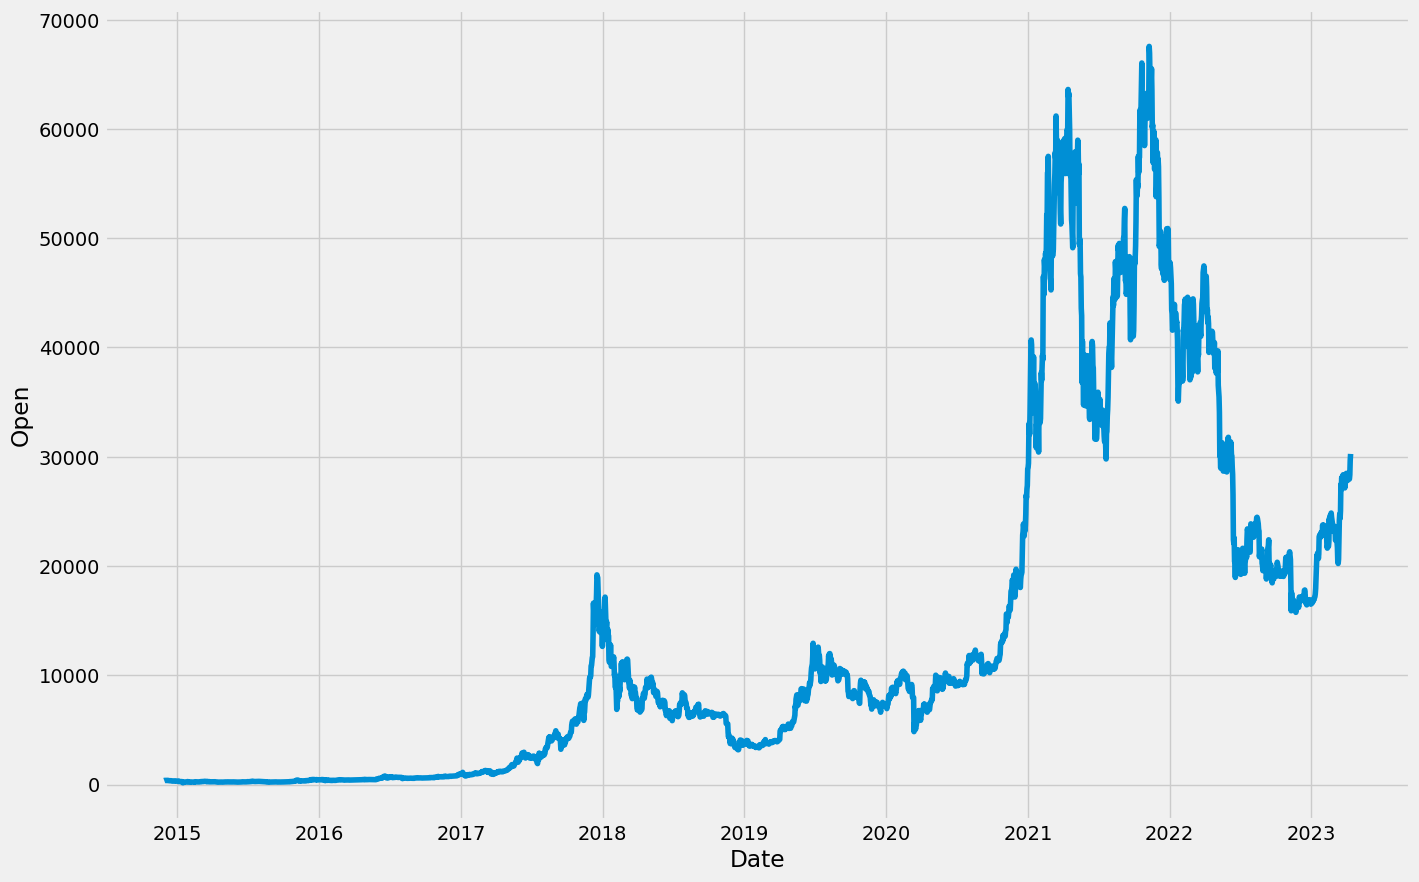

In [15]:
plt.figure(figsize=(15,10))
sns.lineplot(data=dataset,x="Date",y="Open")

## Checking stationarity in data
We can then plot the original time series data and the rolling mean data on the same plot using Matplotlib or Seaborn. If the rolling mean plot shows a stable mean over time, then the time series data is likely stationary.


In [16]:
rolling_mean_50 = dataset.rolling(50).mean()
rolling_mean_200 = dataset.rolling(200).mean()

rolling_std = dataset.rolling(50).std()

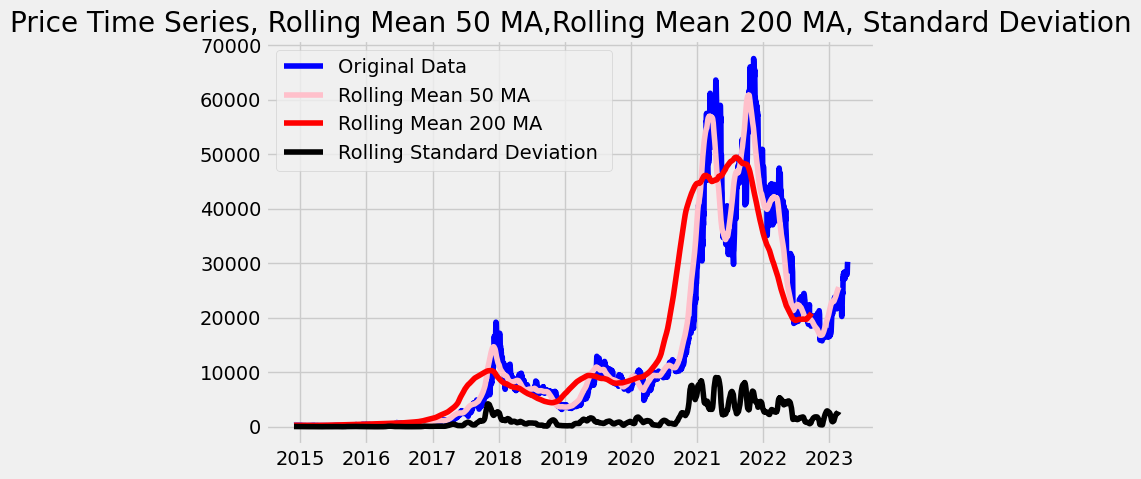

In [19]:
plt.figure(figsize=(7,5))
plt.plot(dataset, color="blue",label="Original Data")
plt.plot(rolling_mean_50, color="pink", label="Rolling Mean 50 MA ")
plt.plot(rolling_mean_200, color="red", label="Rolling Mean 200 MA ")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation ")
plt.title("Price Time Series, Rolling Mean 50 MA,Rolling Mean 200 MA, Standard Deviation")
plt.legend(loc="best")

**The mean or variance of the rolling mean plot changes over time, so the data is likely non-stationary.**

In [20]:
from statsmodels.tsa.stattools import adfuller

# Define function to check stationarity using ADF test
def check_stationarity(data):
    # Perform ADF test
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
    # Check if ADF statistic is less than critical values
    if result[0] < result[4]['5%']:
        print('Data is stationary')
    else:
        print('Data is non-stationary')

# Check stationarity of time series data
check_stationarity(dataset)

ADF Statistic: -1.5178853943460253
p-value: 0.5246458686456562
Critical Values:
	1%: -3.4325114439420568
	5%: -2.862494987665022
	10%: -2.567278364489773
Data is non-stationary


**Based on the ADF test, we can conclude that the time series data is non-stationary and has a downward trend**.
 
1-**The ADF statistic** of -1.5178853943460253 indicates that the time series is trending slightly downwards. 

2-**The p-value** of 0.5246458686456562 is greater than the chosen significance level of 0.05, which means we fail to reject the null hypothesis of non-stationarity.

3- **The critical** values at the 1%, 5%, and 10% levels of significance are -3.4325114439420568, -2.862494987665022, and -2.567278364489773, respectively. 

Since the ADF statistic is greater than all of these critical values, we fail to reject the null hypothesis and conclude that the data is non-stationary. 

<Figure size 1000x700 with 0 Axes>

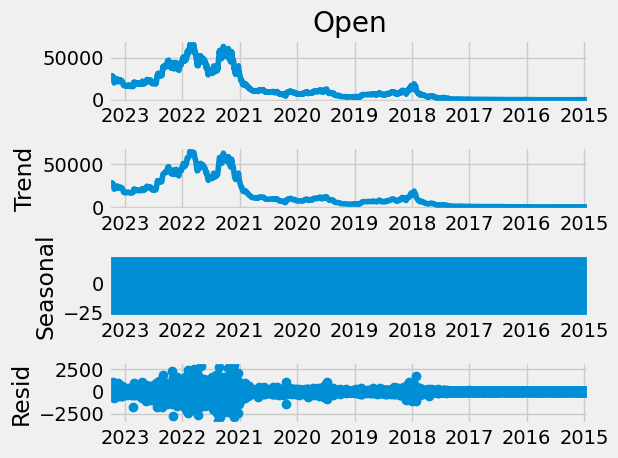

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
plt.figure(figsize=(10,7))
decompose = seasonal_decompose(dataset['Open'],model='additive', period=4)
decompose.plot()
pyplot.show()

#Split data into training and testing sets: 
Divide the preprocessed data into training and testing sets to evaluate the model's performance.

In [30]:
training_set = dataset[dataset.index.year<2023].Open
test_set = dataset[dataset.index.year>=2023].Open
print("The dataset has information from" , dataset.index.min().strftime("%d/%m/%Y"),"to date",dataset.index.max().strftime("%d/%m/%Y"))

The dataset has information from 28/11/2014 to date 12/04/2023


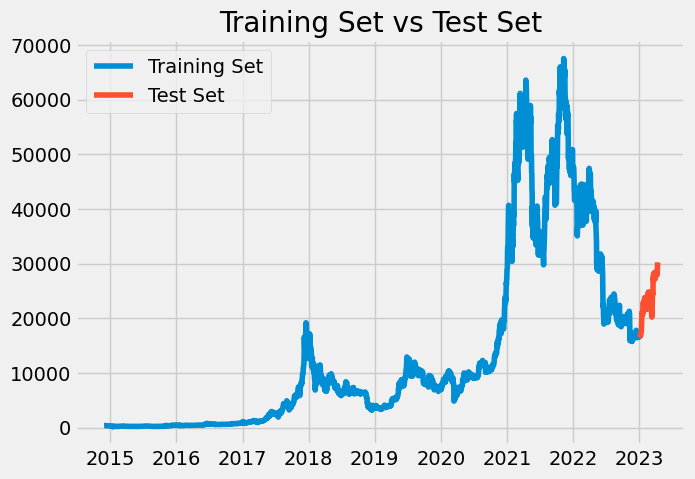

In [32]:
plt.figure(figsize=(7,5))
plt.plot(training_set, label='Training Set')
plt.plot(test_set, label='Test Set')
plt.legend()
plt.title('Training Set vs Test Set')
plt.show()

In [38]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(np.array(training_set).reshape(-1,1))

In [39]:
# Data Preparation
def picker(series,pos,days):
    return list(series[pos:pos+days]), series[pos+days],np.mean(np.array(series[pos:pos+days]))

def prepare_data(series,days):
    pos=0
    X,y=[],[]
    while pos!=len(series)-days:
        X_entry,y_entry,mean=picker(series,pos,days)
        X_entry= np.array(X_entry)
        X.append(X_entry);y.append(y_entry)

        pos+=1
    return np.array(X),np.array(y)

In [44]:
# Since RNN/GRU/LSTM store long term memory state, we create a data structure with n_days timesteps and 1 output
n_days=60
X_train,y_train=prepare_data(training_set_scaled,n_days)

In [45]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [46]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done for the 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = dataset.copy()
inputs = dataset_total[len(dataset_total)-len(test_set) - 30:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

#Train the model: 
Train the RNN model using the training data.

#Gated Recurrent Units

In [47]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

In [48]:
regressorGRU.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            2600      
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_4 (GRU)                 (None, 50)               

##Train the model

In [ ]:
# Compiling the GRU
regressorGRU.compile(optimizer='adam', loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

#LSTM Model

In [52]:
# The LSTM architecture
lstm = Sequential()
lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
lstm.add(Dropout(0.2))
lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=50, activation='relu'))
lstm.add(Dropout(0.2))
lstm.add(Dense(units=1))

In [53]:
lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 50)               

In [54]:
# Compiling the LSTM
lstm.compile(optimizer='adam', loss='mean_squared_error')
# Fitting to the training set
lstm.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
20/20 [==============================] - 9s 108ms/step - loss: 0.0351
Epoch 2/50
20/20 [==============================] - 3s 173ms/step - loss: 0.0048
Epoch 3/50
20/20 [==============================] - 2s 109ms/step - loss: 0.0041
Epoch 4/50
20/20 [==============================] - 2s 110ms/step - loss: 0.0037
Epoch 5/50
20/20 [==============================] - 2s 109ms/step - loss: 0.0031
Epoch 6/50
20/20 [==============================] - 2s 109ms/step - loss: 0.0030
Epoch 7/50
20/20 [==============================] - 3s 175ms/step - loss: 0.0033
Epoch 8/50
20/20 [==============================] - 2s 108ms/step - loss: 0.0030
Epoch 9/50
20/20 [==============================] - 2s 108ms/step - loss: 0.0031
Epoch 10/50
20/20 [==============================] - 2s 107ms/step - loss: 0.0027
Epoch 11/50
20/20 [==============================] - 2s 108ms/step - loss: 0.0030
Epoch 12/50
20/20 [==============================] - 3s 176ms/step - loss: 0.0031
Epoch 13/50
20/20 [======

#Evaluate the model: 
To evaluate the trained LSTM and GRU models, we can use metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) on the test set.


In [55]:
X_test,y_test=prepare_data(sc.transform(np.array(training_set[-n_days:].append(test_set)).reshape(-1,1)),n_days)

<ipython-input-55-0141c2b77202>:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [56]:
X,y=prepare_data(sc.transform(np.array(training_set.append(test_set[:n_days])).reshape(-1,1)),n_days)

<ipython-input-56-d7756a6a0cb8>:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [57]:
# Over training set
LSTM_predicted_price = lstm.predict(X.reshape(X.shape[0],X.shape[1],1))
LSTM_predicted_price_train = sc.inverse_transform(LSTM_predicted_price)

93/93 [==============================] - 3s 17ms/step


In [58]:
# Over training set
GRU_predicted_price = regressorGRU.predict(X.reshape(X.shape[0],X.shape[1],1))
GRU_predicted_price_train = sc.inverse_transform(GRU_predicted_price)

93/93 [==============================] - 2s 12ms/step


In [59]:
# Over test set
LSTM_predicted_price = lstm.predict(X_test.reshape(X_test.shape[0],X_test.shape[1],1))
LSTM_predicted_price_test = sc.inverse_transform(LSTM_predicted_price)

4/4 [==============================] - 0s 18ms/step


In [60]:
# Over test set
GRU_predicted_price = regressorGRU.predict(X_test.reshape(X_test.shape[0],X_test.shape[1],1))
GRU_predicted_price_test = sc.inverse_transform(GRU_predicted_price)

4/4 [==============================] - 0s 33ms/step


In [63]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
fig=go.Figure()
fig.add_traces( go.Scatter(x=dataset[dataset.index.year<2023].index, y=dataset[dataset.index.year<2023].Open, 

                           visible=True,
                           marker={'color':'#ff006e'},
                           showlegend=True,
                           name='Training set (Before 2023)'
                          )
                        
            )
fig.add_traces( go.Scatter(x=dataset[dataset.index.year>=2023].index, y=dataset[dataset.index.year>=2023].Open, 

                           visible=True,
                           marker={'color':'#3a86ff'},
                           showlegend=True,
                           name='Testing set (After 2023)'
                          )
              )

fig.add_traces( go.Scatter(x=dataset[dataset.index.year>=2023].index, y=[i[0] for i in LSTM_predicted_price_test],

                           visible=True,
                           marker={'color':'#007f5f'},
                           showlegend=True,
                           name='Predicted LSTM'
                          )
            )

fig.add_traces( go.Scatter(x=dataset[dataset.index.year<2023].index, y=[i[0] for i in LSTM_predicted_price_train],

                           visible=True,
                           marker={'color':'#007f5f'},
                           showlegend=False,
                           name='Predicted LSTM'
                          )
            )

fig.add_traces( go.Scatter(x=dataset[dataset.index.year>=2023].index, y=[i[0] for i in GRU_predicted_price_test],
                            
                           visible=True,
                           marker={'color':'#fbc4ab'},
                           showlegend=True,
                           name='Predicted GRU'
                          )
            )

fig.add_traces( go.Scatter(x=dataset[dataset.index.year<2023].index, y=[i[0] for i in GRU_predicted_price_train],

                           visible=True,
                           marker={'color':'#fbc4ab'},
                           showlegend=False,
                           name='Predicted GRU'
                          )
            )
fig.update_layout(title='Bitcoin  Price Prediction LSTM and GRU',dragmode=False)
fig.show()

In [65]:
# Evaluating GRU
rmse_return(test_set,GRU_predicted_price_test)

The root mean squared error is 4600.532828573371.


In [66]:
# Evaluate LSTM model
mse_lstm = mean_squared_error(test_set,LSTM_predicted_price_test)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(test_set,LSTM_predicted_price_test)

# Evaluate GRU model
mse_gru = mean_squared_error(test_set,GRU_predicted_price_test)
rmse_gru = np.sqrt(mse_gru)
mae_gru = mean_absolute_error(test_set,GRU_predicted_price_test)

print("LSTM Model Evaluation:")
print("MSE:", mse_lstm)
print("RMSE:", rmse_lstm)
print("MAE:", mae_lstm)

print("GRU Model Evaluation:")
print("MSE:", mse_gru)
print("RMSE:", rmse_gru)
print("MAE:", mae_gru)

LSTM Model Evaluation:
MSE: 45548469.30591707
RMSE: 6748.960609302522
MAE: 3388.6037627575442
GRU Model Evaluation:
MSE: 21164902.306781307
RMSE: 4600.532828573371
MAE: 1932.582077325559


These are the evaluation metrics for two different models trained on the same data:

**1-LSTM Model Evaluation:**

**Mean Squared Error (MSE)**: 45548469.30591707

**Root Mean Squared Error (RMSE)**: 6748.960609302522

**Mean Absolute Error (MAE)**: 3388.6037627575442

**2-GRU Model Evaluation:**

**Mean Squared Error (MSE)**: 21164902.306781307

**Root Mean Squared Error (RMSE)**: 4600.532828573371

**Mean Absolute Error (MAE)**: 1932.582077325559


From the given evaluation metrics, it appears that the GRU model performs better than the LSTM model as it has a lower MSE, RMSE, and MAE.

#The models for Bitcoin price prediction may not have performed well due to several factors. 
For example, the cryptocurrency market is known for its high volatility, which can make it challenging to accurately predict prices. Moreover, external factors such as geopolitical events, regulatory policies, and economic conditions can also impact the cryptocurrency market and influence price movements.

To improve the accuracy of the models, it may be beneficial to consider additional features and data sources. For instance, sentiment analysis of social media platforms like Twitter and Reddit can provide valuable insights into market sentiment towards Bitcoin and other cryptocurrencies. Additionally, incorporating fundamental data such as adoption rates, transaction volumes, and network effects can also help capture the intrinsic value of Bitcoin.

Overall, it's important to evaluate the models carefully and continually refine them based on changing market conditions and new data. By doing so, it may be possible to develop more accurate models for Bitcoin price prediction.